# Data Visualization using pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

In [2]:
# Create the global superstore data frame from the excel Global Superstore.xls (Orders tab)

global_superstore_df = pd.read_excel('C:\PythonTutorial\MyPandas_Blog\data sets\Global Superstore.xls','Orders')

global_superstore_df.shape

(51290, 24)

In [3]:
global_superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Creating a Histogram or order priorities using matplotlib

In [4]:
plt.style.use('fivethirtyeight') # We will use the plot style fivethirtyeight for our demontrtation

In [5]:
order_priority = global_superstore_df['Order Priority']

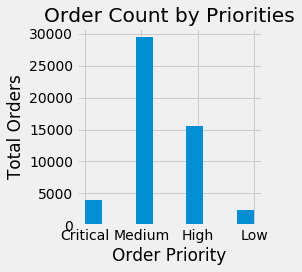

In [6]:
plt.figure(figsize = (4,4)) ## To adjust the figure size
plt.hist(list(order_priority), orientation = 'vertical')
plt.title('Order Count by Priorities')
plt.xlabel('Order Priority')
plt.ylabel('Total Orders')

plt.tight_layout()
plt.show()

# Creating a bar chart of order priority and count using matplotlib

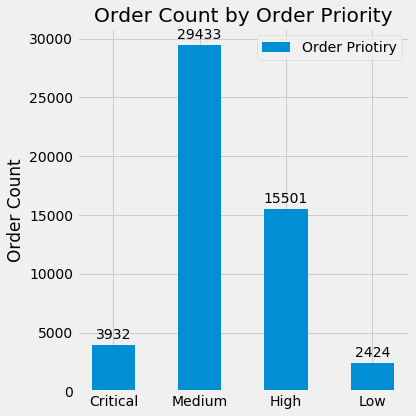

In [7]:
priority_counter = Counter()
priority_counter.update(list(order_priority))

list_order_priority = list(priority_counter.keys())
list_order_count = list(priority_counter.values())

x = np.arange(len(list_order_priority))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize = (6,6))
rects1 = ax.bar(x, list_order_count, width, label='Order Priotiry')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Order Count')
ax.set_title('Order Count by Order Priority')
ax.set_xticks(x)
ax.set_xticklabels(list_order_priority)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)

fig.tight_layout()

plt.show()

# Creating a histogram of order priority and order count by year

In [8]:
#Create a new column as Order Year and add it to the data set
#global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year
#
##Get the list of distinct order priorities
#list_order_priority = list(global_superstore_df['Order Priority'].unique())
##print(list_order_priority)
#
##Now group by order year
#order_priority_by_year_df = global_superstore_df.groupby('Order Year')
#list_order_year = list(global_superstore_df['Order Year'].unique())
#
#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')
#        
##Do the visualization
#x = np.arange(len(list_order_priority))  # the label locations
#print (x)
#width = 1  # the width of the bars
#fig, ax = plt.subplots(figsize = (10,6))
#
#dict_order_priority_by_year = {}
#for order_year,order_year_df in order_priority_by_year_df:
#    priority_counter_by_year = Counter()
#    priority_counter_by_year.update(sorted(list(order_year_df['Order Priority'])))
#    list_priority = list(priority_counter_by_year.keys())
#    list_order_count = list(priority_counter_by_year.values())
#    #print(f'{order_year} - {list_priority,list_order_count}')
#    dict_order_priority_by_year[order_year] = (list_priority,list_order_count)
#    
#rects = list()
##print("--------------------------")
#position = x - width / len(x)
#for key in dict_order_priority_by_year.keys():
#    #print(f'{key} - {dict_order_priority_by_year[key]}')
#    for rect_idx in x:
#        #print(rect_idx)
#        list_priorities = dict_order_priority_by_year[key][0]
#        list_order_count = dict_order_priority_by_year[key][1]
#        #print(list_priorities)
#        #print(list_order_count)
#        print(list_order_count[rect_idx])
#        print(position)
#        rects.append(ax.bar(position, list_order_count[rect_idx], width/4, label = key))
#        position += width / len(x)
#        autolabel(rects[rect_idx])
#        ax.legend()
#    print("*****************")
#
## Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Order Count')
#ax.set_title('Order by order priority and year')
#ax.set_xticks(x)
#ax.set_xticklabels(list_priorities)
##ax.legend()
#
#fig.tight_layout()
#plt.show()

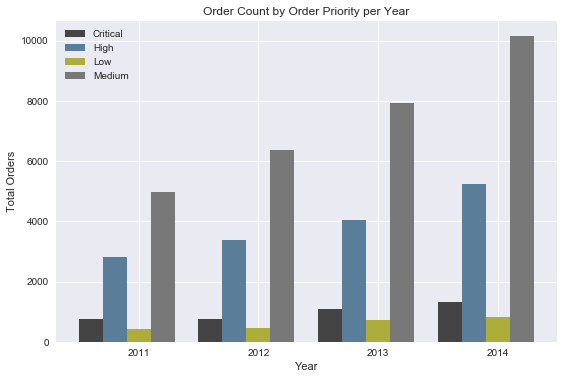

In [9]:
#Create a new column as Order Year and add it to the data set
global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year

#Get the list of distinct order priorities
list_order_priority = list(global_superstore_df['Order Priority'].unique())

##Now group by order year
order_priority_by_year_df = global_superstore_df.groupby('Order Year')
list_order_year = list(global_superstore_df['Order Year'].unique())

dict_order_priority_by_year = {}
years_x = []
critical_y = []
high_y = []
low_y = []
medium_y = []

for order_year,order_year_df in order_priority_by_year_df:
    years_x.append(order_year)
    priority_counter_by_year = Counter()
    priority_counter_by_year.update(sorted(list(order_year_df['Order Priority'])))
    for key in dict(priority_counter_by_year).keys():
        if key == 'Critical':
            critical_y.append(dict(priority_counter_by_year)[key])
        elif key == 'High':
            high_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Low':
            low_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Medium':
            medium_y.append(dict(priority_counter_by_year)[key])
        else:
            pass
width = 0.2
x_indexes = np.arange(len(years_x))

plt.style.use('seaborn') 
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Order Count by Order Priority per Year')
plt.bar(x_indexes - 2*width,critical_y, width = width , color = '#444444', linewidth = 3, label = 'Critical')  
plt.bar(x_indexes - width,high_y, width = width , color = '#5a7d9a', linewidth = 3, label = 'High') 
plt.bar(x_indexes,low_y, width = width , color = '#adad3b', linewidth = 3, label = 'Low') 
plt.bar(x_indexes + width,medium_y, width = width , color = '#787878', linewidth = 3, label = 'Medium') 

plt.legend(['Critical','High','Low','Medium'])  
plt.xticks(x_indexes, labels = years_x)
plt.show()

# Creating a line chart of order count by year using matplotlib

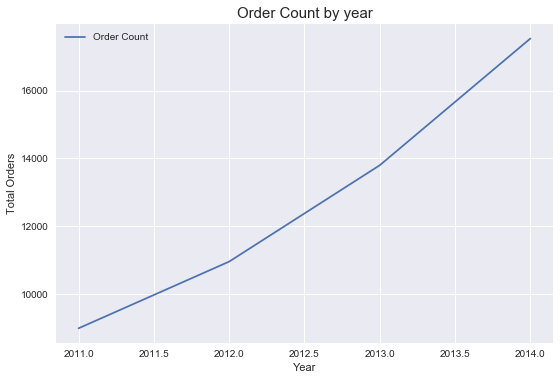

In [10]:
#Create a new column as Order Year and add it to the data set
global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year

##Now group by order year
order_priority_by_year_df = global_superstore_df.groupby('Order Year')
list_order_year = list(sorted(global_superstore_df['Order Year'].unique()))

list_order_count = list(order_priority_by_year_df['Order ID'].count())

plt.style.use('seaborn')
plt.plot(list_order_year, list_order_count, label='Order Count')
plt.legend()

plt.title('Order Count by year', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Total Orders')

plt.tight_layout()

plt.show()

In [11]:
# Creating a line chart of order count by priority per year using matplotlib

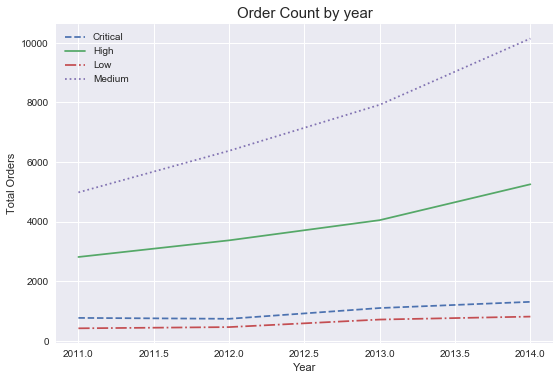

In [12]:
#Create a new column as Order Year and add it to the data set
global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year

#Get the list of distinct order priorities
list_order_priority = list(global_superstore_df['Order Priority'].unique())

##Now group by order year
order_priority_by_year_df = global_superstore_df.groupby('Order Year')
list_order_year = list(sorted(global_superstore_df['Order Year'].unique()))

dict_order_priority_by_year = {}
years_x = []
critical_y = []
high_y = []
low_y = []
medium_y = []

for order_year,order_year_df in order_priority_by_year_df:
    years_x.append(order_year)
    priority_counter_by_year = Counter()
    priority_counter_by_year.update(sorted(list(order_year_df['Order Priority'])))
    for key in dict(priority_counter_by_year).keys():
        if key == 'Critical':
            critical_y.append(dict(priority_counter_by_year)[key])
        elif key == 'High':
            high_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Low':
            low_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Medium':
            medium_y.append(dict(priority_counter_by_year)[key])
        else:
            pass

plt.style.use('seaborn')
plt.plot(years_x, critical_y, linestyle = "--", label = 'Critical')
plt.plot(years_x, high_y, linestyle = "-" , label = 'High')
plt.plot(years_x, low_y, linestyle = "-." , label = 'Low')
plt.plot(years_x, medium_y, linestyle = ":" , label = 'Medium')
plt.legend()

plt.title('Order Count by year', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Total Orders')

plt.tight_layout()

plt.show()

# Creating a line chart of order count by priority per year using matplotlib using subplot

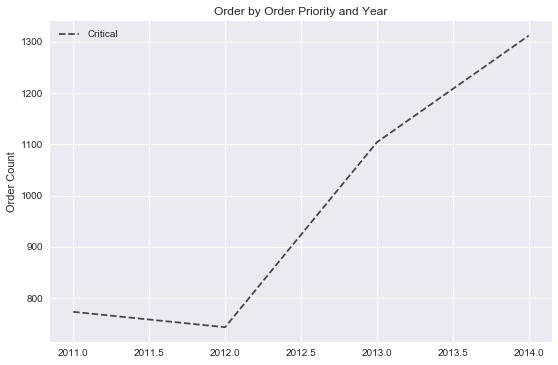

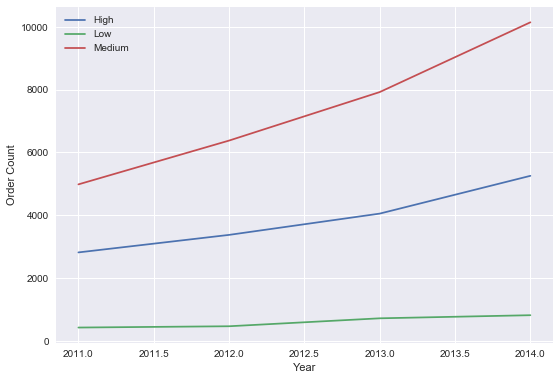

In [13]:
#Create a new column as Order Year and add it to the data set
global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year

#Get the list of distinct order priorities
list_order_priority = list(global_superstore_df['Order Priority'].unique())

##Now group by order year
order_priority_by_year_df = global_superstore_df.groupby('Order Year')
list_order_year = list(sorted(global_superstore_df['Order Year'].unique()))

dict_order_priority_by_year = {}
years_x = []
critical_y = []
high_y = []
low_y = []
medium_y = []

for order_year,order_year_df in order_priority_by_year_df:
    years_x.append(order_year)
    priority_counter_by_year = Counter()
    priority_counter_by_year.update(sorted(list(order_year_df['Order Priority'])))
    for key in dict(priority_counter_by_year).keys():
        if key == 'Critical':
            critical_y.append(dict(priority_counter_by_year)[key])
        elif key == 'High':
            high_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Low':
            low_y.append(dict(priority_counter_by_year)[key])
        elif key == 'Medium':
            medium_y.append(dict(priority_counter_by_year)[key])
        else:
            pass

plt.style.use('seaborn')

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(years_x, critical_y, color='#444444',linestyle='--', label='Critical')

ax2.plot(years_x, high_y, label='High')
ax2.plot(years_x, low_y, label='Low')
ax2.plot(years_x, medium_y, label='Medium')

ax1.legend()
ax1.set_title('Order by Order Priority and Year')
ax1.set_ylabel('Order Count')

ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Order Count')

plt.tight_layout()

plt.show()

# Creating histograms per year for order by priority

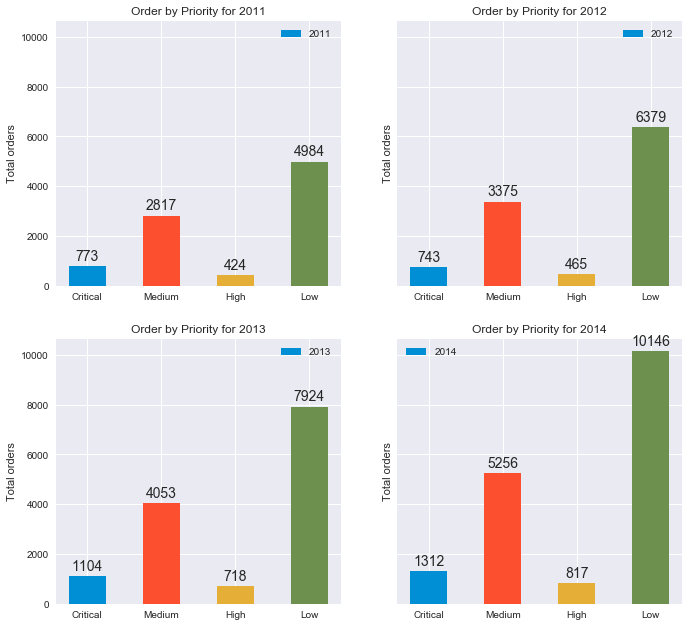

In [14]:
#Create a new column as Order Year and add it to the data set
global_superstore_df['Order Year'] = global_superstore_df['Order Date'].dt.year

#Get the list of distinct order priorities
list_order_priority = list(global_superstore_df['Order Priority'].unique())

##Now group by order year
order_priority_by_year_df = global_superstore_df.groupby('Order Year')
list_order_year = list(sorted(global_superstore_df['Order Year'].unique()))


for order_year,order_year_df in order_priority_by_year_df:
    priority_counter_by_year = Counter()
    priority_counter_by_year.update(sorted(list(order_year_df['Order Priority'])))
    dict_order_priority_by_year[order_year] = dict(priority_counter_by_year)
    
plt.style.use('seaborn')


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), sharex = False, sharey = True)

def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
year = 2010
color = ['#008fd5','#fc4f30','#e5ae37','#6d904f']
for i in np.arange(0,2):
    for j in np.arange(0,2):
        year += 1
        rect = axes[i][j].bar(list_order_priority, list(dict_order_priority_by_year[year].values()),
                              color = color, width = .5, label = year)
        autolabel(rect,axes[i][j])
        axes[i][j].set_ylabel(f'Total orders')
        axes[i][j].set_title(f'Order by Priority for {year}')
        axes[i][j].legend()
plt.show()


# Creating horizontal bar chart for top 20 customers

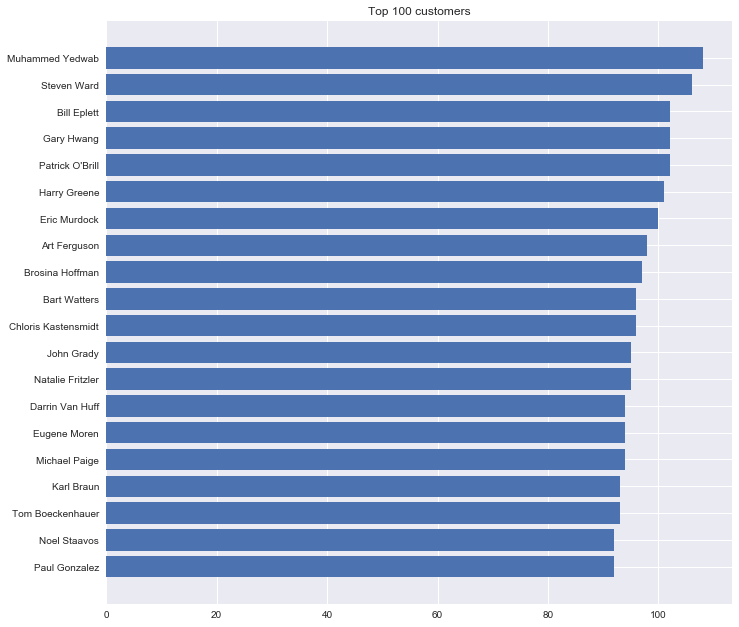

In [15]:
##Group by order customer
order_by_customer_df = global_superstore_df.groupby('Customer Name')

order_by_customer = Counter()
for cust_name, cust_name_df in order_by_customer_df:
    order_by_customer.update(cust_name_df['Customer Name'])
    
list_customer = []
list_order_count = []
for cust,order_count in order_by_customer.most_common(20):
    list_customer.insert(0,cust)
    list_order_count.insert(0,order_count)

fig, axis = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

plt.style.use('seaborn')
rect = axis.barh(list_customer,list_order_count,label = "cust")
axis.set_title("Top 100 customers")
plt.show()

# Creating word cloud of product name by sales

*SELECT product_name,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY product_name
ORDER BY sum(sales) DESC;*

![SELECT product_name,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY product_name
ORDER BY sum(sales) DESC](images/product_by_sales.jpg "SELECT product_name,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY product_name
ORDER BY sum(sales) DESC;")

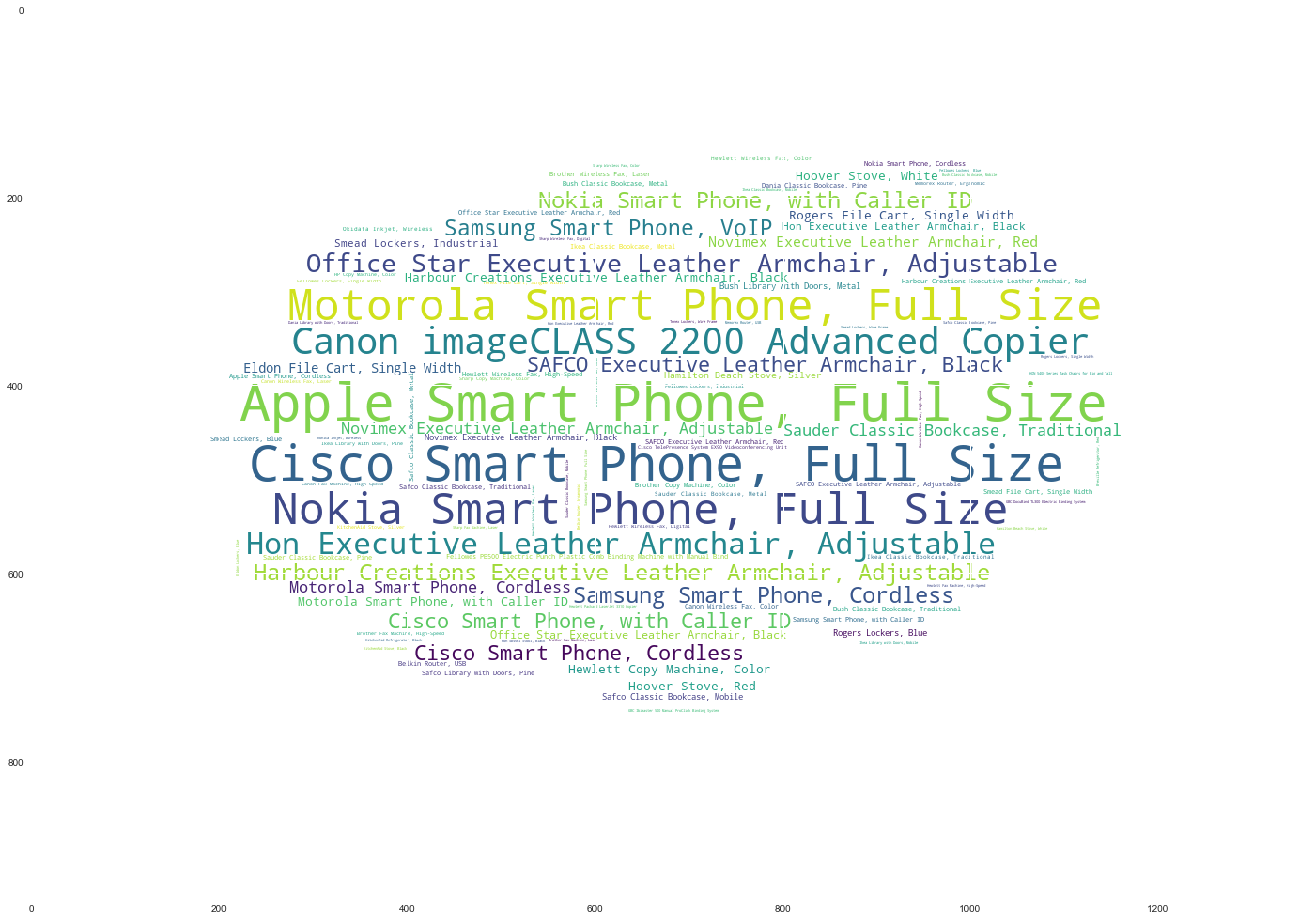

In [54]:
##Group by product name
#Import the libraries required for the word cloud
import os
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

order_by_product_df = global_superstore_df.groupby('Product Name')

dict_product_sales = {}
for product_name,group_by_product_df in order_by_product_df:
    dict_product_sales[product_name] = group_by_product_df['Sales'].sum()

image_dir = os.path.join(os.getcwd(),"images")
mask = np.array(Image.open(os.path.join(image_dir,"cloud.png")))
wc = WordCloud(background_color="white",mask = mask,
               width=1500,
               height=1500,
               max_words=500,
               ).generate_from_frequencies(dict_product_sales)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
plt.imshow(wc)
    